# Clean Data

The code uses Python 3.11+ with the following major libraries: \verb|pandas|, \verb|numpy|, \verb|matplotlib|, \verb|seaborn|, \verb|statsmodels|, \verb|scikit-learn|, and \verb|xgboost|.
Plots are configured to use a serif font via Matplotlib (without \LaTeX) to keep styling simple.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Make plots match LaTeX (CIBB-style) report ===
plt.rcParams.update({
    "font.family": "serif",               # Use serif font to match LaTeX
    "font.serif": ["Times New Roman", "Times", "Computer Modern Roman"],
    "axes.titlesize": 14,                 # Section-level figure title
    "axes.labelsize": 12,                 # Axis label size
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 10,
    "figure.titlesize": 14,
    "figure.dpi": 300,
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "pdf.fonttype": 42,                   # Embed editable text in PDFs
    "ps.fonttype": 42,
})

sns.set_theme(style="whitegrid", font_scale=1)

def export_figure(filename):
    """Helper function to save figures consistently for LaTeX inclusion."""
    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight", dpi=300)
    plt.show()


In [2]:
import pandas as pd
import glob
import os

# Root path containing all the "Station XXXX-YYYY" folders
root_path = "."   # change if needed

# Find all station folders
station_folders = [f for f in glob.glob(os.path.join(root_path, "Station *")) if os.path.isdir(f)]

for folder_path in station_folders:
    station_id = os.path.basename(folder_path).replace("Station ", "")
    print(f"📂 Processing {station_id}...")

    # Get files in the folder, skip Excel temp files (~$)
    files = [f for f in glob.glob(os.path.join(folder_path, "*")) 
             if not os.path.basename(f).startswith("~$")]

    dfs = []
    for file in files:
        fname = os.path.basename(file)
        ext = os.path.splitext(file)[-1].lower()

        try:
            # Try with skiprows=11 (common GDOT format), fallback otherwise
            if ext in [".xlsx", ".xls"]:
                try:
                    df = pd.read_excel(file, engine="openpyxl", skiprows=11)
                except:
                    df = pd.read_excel(file, engine="openpyxl")
            elif ext == ".csv":
                df = pd.read_csv(file)
            else:
                print(f"⚠️ Skipping unsupported file: {fname}")
                continue

            # Add SourceFile + Month
            month_name = fname.replace(station_id, "").replace(".xlsx","").replace(".xls","").replace(".csv","").strip()
            df["Month"] = month_name
            df["SourceFile"] = fname

            dfs.append(df)

        except Exception as e:
            print(f"❌ Could not read {fname}: {e}")

    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)

        # Drop fully empty columns
        combined_df = combined_df.dropna(axis=1, how="all")

        # --- NaN Fix ---
        if "Count" in combined_df.columns:
            # Flag missing
            combined_df["Imputed"] = combined_df["Count"].isna()

            # Fill short gaps (linear interpolation)
            combined_df["Count"] = combined_df["Count"].interpolate(method="linear")

            # Fill any remaining NaNs with Hour+Day means
            if "Hour" in combined_df.columns and "Day" in combined_df.columns:
                combined_df["Count"] = combined_df.groupby(["Day","Hour"])["Count"].transform(
                    lambda x: x.fillna(x.mean())
                )

        # Save cleaned ANOVA-ready file
        output_file = os.path.join(folder_path, f"Station {station_id} ANOVA-ready.xlsx")
        combined_df.to_excel(output_file, index=False)

        print(f"✅ Saved {output_file}")
    else:
        print(f"⚠️ No valid files found for {station_id}")


📂 Processing 175-0256...
⚠️ Skipping unsupported file: Station 175-0256_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 175-0256_Figure1b_ByDay.png
✅ Saved ./Station 175-0256/Station 175-0256 ANOVA-ready.xlsx
📂 Processing 121-6370...
⚠️ Skipping unsupported file: Station 121-6370_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 121-6370_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 121-6370/Station 121-6370 ANOVA-ready.xlsx
📂 Processing 121-5508...
⚠️ Skipping unsupported file: Station 121-5508_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 121-5508_Figure1b_ByDay.png
✅ Saved ./Station 121-5508/Station 121-5508 ANOVA-ready.xlsx
📂 Processing 121-9438...
⚠️ Skipping unsupported file: Station 121-9438_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 121-9438_Figure1b_ByDay.png
✅ Saved ./Station 121-9438/Station 121-9438 ANOVA-ready.xlsx
📂 Processing 187-0009...
⚠️ Skipping unsupported file: Station 187-0009_Figure1a_WeekdayWeek

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/3584191521.py:59: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df["Count"] = combined_df["Count"].interpolate(method="linear")


✅ Saved ./Station 021-0258/Station 021-0258 ANOVA-ready.xlsx
📂 Processing 245-0227...
⚠️ Skipping unsupported file: Station 245-0227_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 245-0227_Figure1b_ByDay.png


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/3584191521.py:59: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df["Count"] = combined_df["Count"].interpolate(method="linear")


✅ Saved ./Station 245-0227/Station 245-0227 ANOVA-ready.xlsx
📂 Processing 215-0325...
⚠️ Skipping unsupported file: Station 215-0325_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 215-0325_Figure1b_ByDay.png
✅ Saved ./Station 215-0325/Station 215-0325 ANOVA-ready.xlsx
📂 Processing 113-0316...
⚠️ Skipping unsupported file: Station 113-0316_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 113-0316_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 113-0316/Station 113-0316 ANOVA-ready.xlsx
📂 Processing 139-0418...
⚠️ Skipping unsupported file: Station 139-0418_Figure1a_WeekdayWeekend.png
⚠️ Skipping unsupported file: Station 139-0418_Figure1b_ByDay.png


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/3584191521.py:59: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df["Count"] = combined_df["Count"].interpolate(method="linear")


✅ Saved ./Station 139-0418/Station 139-0418 ANOVA-ready.xlsx
📂 Processing 089-9907...
⚠️ Skipping unsupported file: Station 089-9907_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 089-9907_Figure1a_WeekdayWeekend.png


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/3584191521.py:59: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df["Count"] = combined_df["Count"].interpolate(method="linear")


✅ Saved ./Station 089-9907/Station 089-9907 ANOVA-ready.xlsx
📂 Processing 051-9818...
⚠️ Skipping unsupported file: Station 051-9818_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 051-9818_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 051-9818/Station 051-9818 ANOVA-ready.xlsx
📂 Processing 089-9707...
⚠️ Skipping unsupported file: Station 089-9707_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 089-9707_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 089-9707/Station 089-9707 ANOVA-ready.xlsx
📂 Processing 127-0289...
⚠️ Skipping unsupported file: Station 127-0289_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 127-0289_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 127-0289/Station 127-0289 ANOVA-ready.xlsx
📂 Processing 295-0035...
⚠️ Skipping unsupported file: Station 295-0035_Figure1b_ByDay.png
⚠️ Skipping unsupported file: Station 295-0035_Figure1a_WeekdayWeekend.png
✅ Saved ./Station 295-0035/Station 295-0035 ANOVA-ready.xlsx
📂 Processing 089-3572...
⚠️ Ski

# Figure 1

## Weekend vs Weekday

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

# Load all ANOVA-ready files
root_path = "."
anova_files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

sns.set_theme(style="whitegrid")

all_dfs = []
for file in anova_files:
    df = pd.read_excel(file)
    df = df.rename(columns={df.columns[0]: "Hour"})
    date_cols = [c for c in df.columns if c != "Hour"]

    df_long = df.melt(id_vars=["Hour"], value_vars=date_cols,
                      var_name="Date", value_name="TrafficVolume")
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    df_long = df_long.dropna(subset=["Date"])

    df_long["Hour"] = pd.to_datetime(df_long["Hour"], format="%H:%M:%S", errors="coerce").dt.hour
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")

    df_long["Day"] = df_long["Date"].dt.day_name().str[:3]
    df_long["DayType"] = df_long["Day"].isin(["Sat", "Sun"]).map({True: "Weekend", False: "Weekday"})

    all_dfs.append(df_long)

df_all = pd.concat(all_dfs, ignore_index=True)
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })
# 🔹 Plot Weekday vs Weekend (mean + std shading)
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_all, x="Hour", y="TrafficVolume", hue="DayType",
    estimator="mean", errorbar="se", linewidth=2, alpha=0.9, palette="Set1"
)
plt.title("Hourly Traffic Profiles (Weekday vs Weekend, All Stations Combined)")
plt.ylabel("Mean Hourly Traffic Volume")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.legend(title="Day Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figure1a_Overall_WeekdayWeekend_SE.png", dpi=300)
plt.show()


ValueError: No objects to concatenate

## Day of the Week

/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

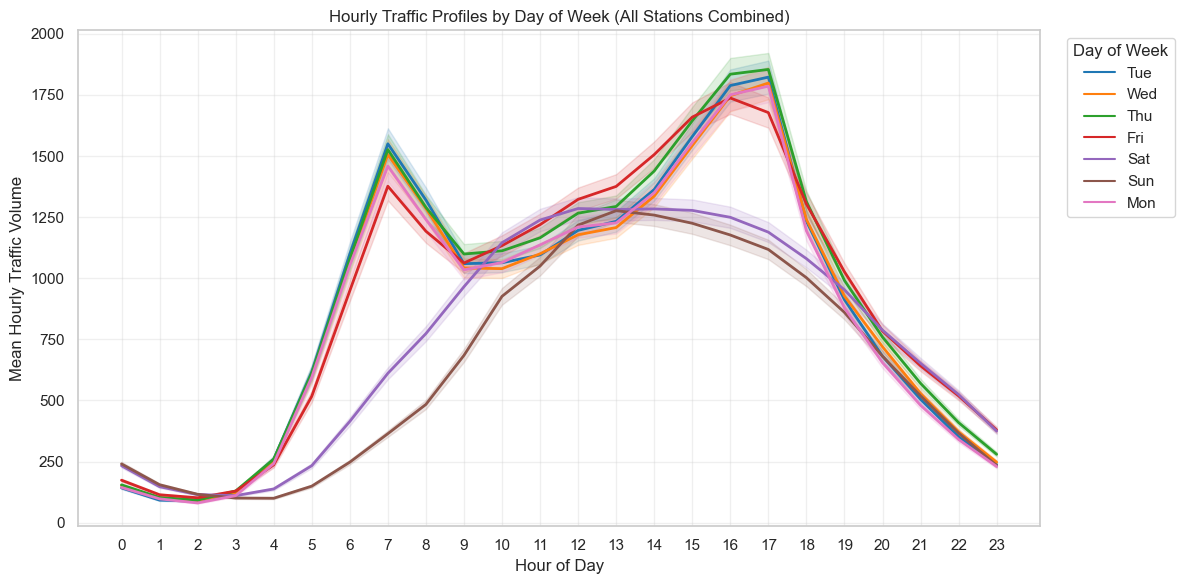

In [ ]:
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_all, x="Hour", y="TrafficVolume", hue="Day",
    estimator="mean", errorbar="se", linewidth=2, palette="tab10",
    err_kws={"alpha":0.15}   # 🔹 lighter SE shading
)
plt.title("Hourly Traffic Profiles by Day of Week (All Stations Combined)")
plt.ylabel("Mean Hourly Traffic Volume")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.legend(title="Day of Week", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figure1b_Overall_ByDay_SE_Clean.png", dpi=300)
plt.show()


# Figure 2

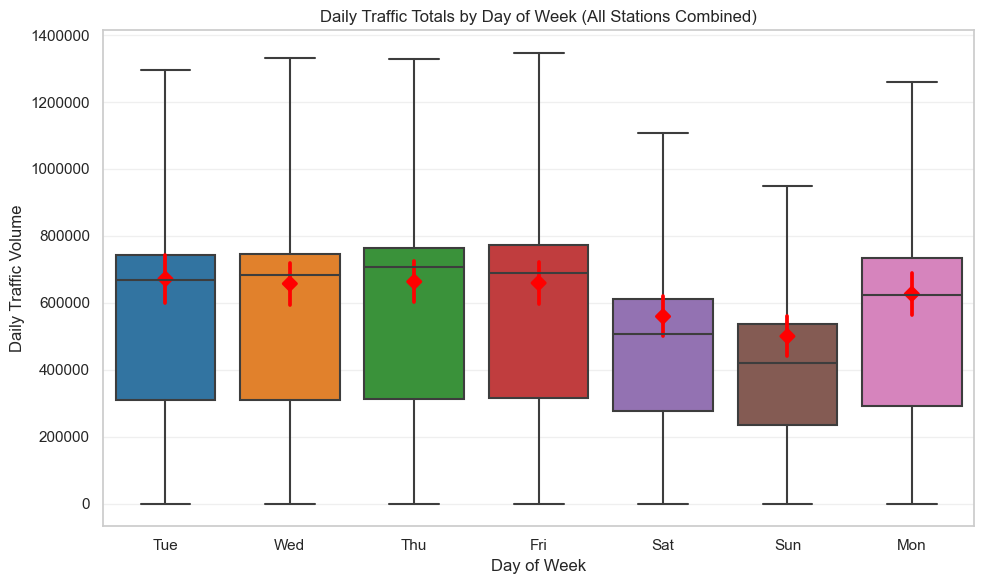

In [ ]:
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })
plt.figure(figsize=(10,6))

# Boxplot (quartiles + median)
sns.boxplot(
    data=df_all, x="Day", y="TrafficVolume", palette="tab10",
    showfliers=False
)

# Overlay mean values with SE error bars
sns.pointplot(
    data=df_all, x="Day", y="TrafficVolume",
    estimator="mean", errorbar="se", color="red", markers="D", linestyles=""
)

plt.title("Daily Traffic Totals by Day of Week (All Stations Combined)")
plt.ylabel("Daily Traffic Volume")
plt.xlabel("Day of Week")

# Keep y-axis plain numbers
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

plt.grid(alpha=0.3, axis="y")
plt.tight_layout()
plt.savefig("Figure2_Overall_DayOfWeek_Boxplot_SE.png", dpi=300)
plt.show()


# Figure 3

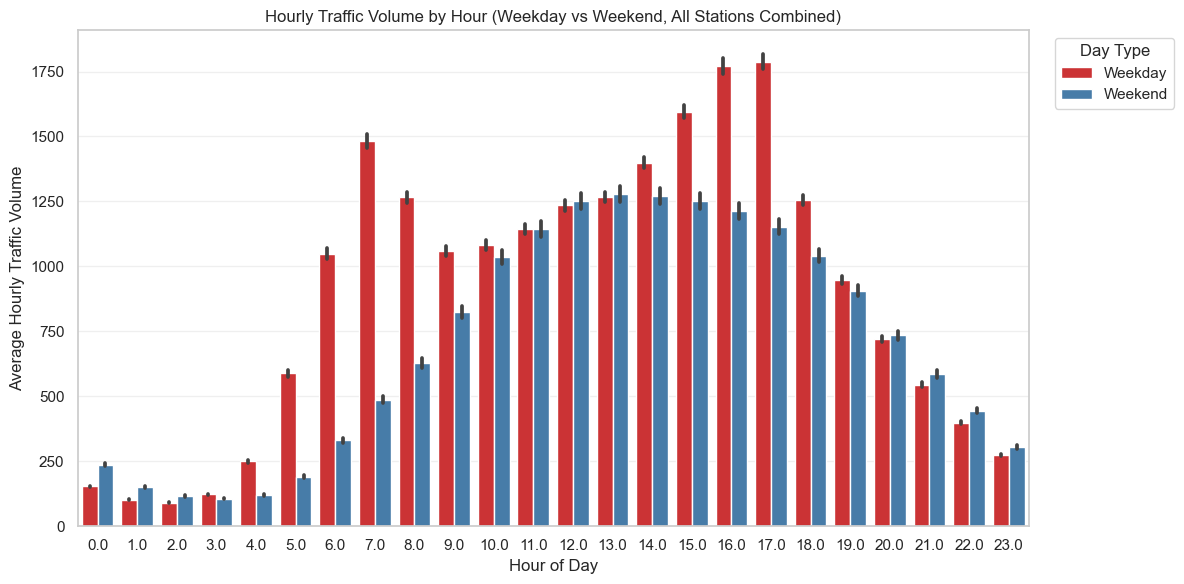

In [ ]:
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })
plt.figure(figsize=(12,6))

# Bar chart of mean traffic by hour, with SE error bars
sns.barplot(
    data=df_all, x="Hour", y="TrafficVolume", hue="DayType",
    estimator="mean", errorbar="se", palette="Set1"
)

plt.title("Hourly Traffic Volume by Hour (Weekday vs Weekend, All Stations Combined)")
plt.ylabel("Average Hourly Traffic Volume")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.legend(title="Day Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3, axis="y")
plt.tight_layout()
plt.savefig("Figure3_Overall_WeekdayWeekend_Bar_SE.png", dpi=300)
plt.show()


# Figure 4

## Daily Traffic Totals

/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


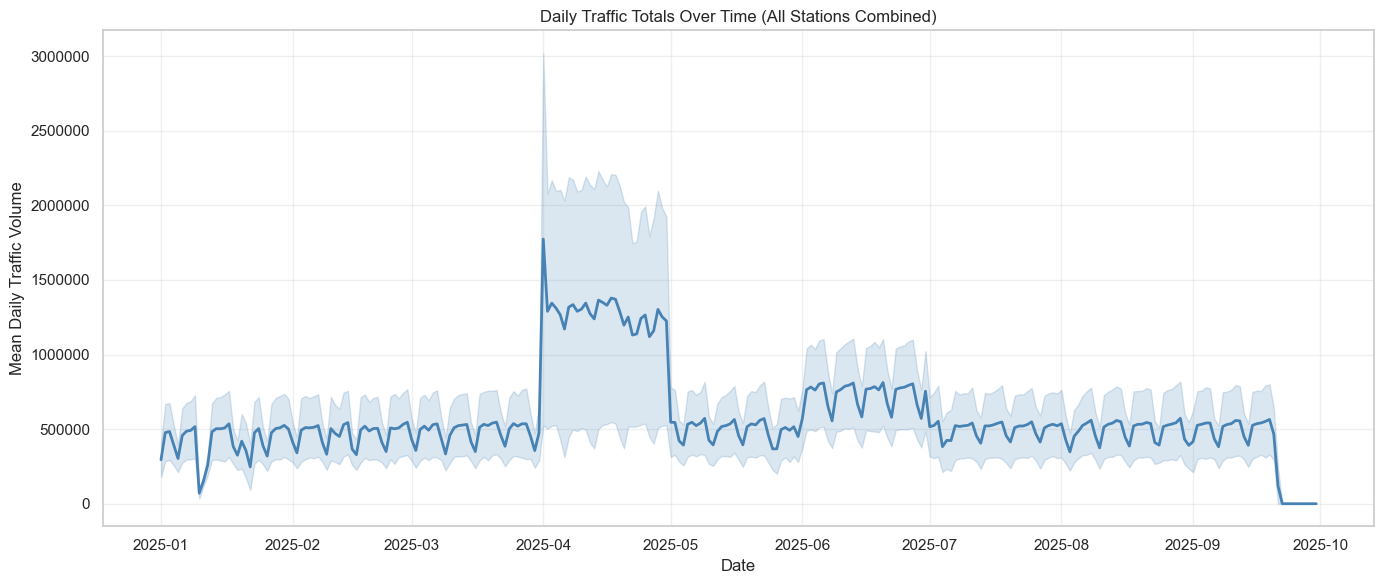

In [ ]:
import matplotlib.ticker as mtick

plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

plt.figure(figsize=(14,6))

# Combine daily totals from all stations
all_daily = []

for file in anova_files:
    df = pd.read_excel(file)
    df = df.rename(columns={df.columns[0]: "Hour"})
    date_cols = [c for c in df.columns if c != "Hour"]

    df_long = df.melt(id_vars=["Hour"], value_vars=date_cols,
                      var_name="Date", value_name="TrafficVolume")
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    df_long = df_long.dropna(subset=["Date"])
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")

    daily_totals = df_long.groupby("Date")["TrafficVolume"].sum().reset_index()
    all_daily.append(daily_totals)

df_daily_all = pd.concat(all_daily, ignore_index=True)

# 🔹 Plot daily trend
sns.lineplot(
    data=df_daily_all, x="Date", y="TrafficVolume",
    estimator="mean", errorbar="se", linewidth=2, color="steelblue"
)

plt.title("Daily Traffic Totals Over Time (All Stations Combined)")
plt.ylabel("Mean Daily Traffic Volume")
plt.xlabel("Date")

# ✅ Plain number ticks (no commas, no K)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figure4_Overall_DailyTrends_SE.png", dpi=300)
plt.show()


## Daily Traffic Totals by Day Type

/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

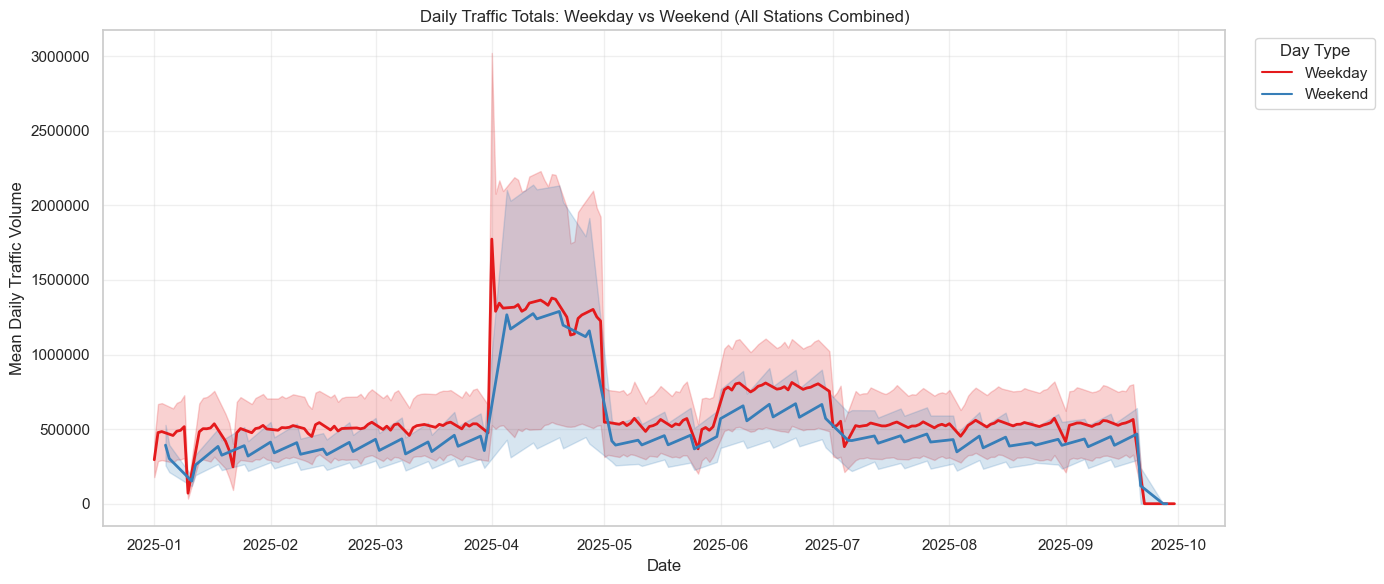

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import glob, os

# Load all ANOVA-ready files
root_path = "."
anova_files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

all_daily = []

# Build daily totals across all stations
for file in anova_files:
    df = pd.read_excel(file)
    df = df.rename(columns={df.columns[0]: "Hour"})
    date_cols = [c for c in df.columns if c != "Hour"]

    # Melt wide → long
    df_long = df.melt(id_vars=["Hour"], value_vars=date_cols,
                      var_name="Date", value_name="TrafficVolume")
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    df_long = df_long.dropna(subset=["Date"])
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")

    # Daily totals per station
    daily_totals = df_long.groupby("Date")["TrafficVolume"].sum().reset_index()
    all_daily.append(daily_totals)

# Combine across stations
df_daily_all = pd.concat(all_daily, ignore_index=True)

# Classify Weekday vs Weekend
df_daily_all["DayType"] = df_daily_all["Date"].dt.day_name().str[:3]
df_daily_all["DayType"] = df_daily_all["DayType"].apply(
    lambda d: "Weekend" if d in ["Sat","Sun"] else "Weekday"
)

plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

# 🔹 Plot daily totals (Weekday vs Weekend overlay)
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_daily_all, x="Date", y="TrafficVolume",
    estimator="mean", errorbar="se", hue="DayType",
    palette="Set1", linewidth=2
)

plt.title("Daily Traffic Totals: Weekday vs Weekend (All Stations Combined)")
plt.ylabel("Mean Daily Traffic Volume")
plt.xlabel("Date")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))  # plain numbers
plt.legend(title="Day Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figure5_Overall_WeekdayWeekend_DailyTotals.png", dpi=300)
plt.show()


# ANOVA

In [26]:
import pandas as pd
import glob, os
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Path to your ANOVA-ready files
root_path = "."
anova_files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

results = []

for file in anova_files:
    station = os.path.basename(file).replace(" ANOVA-ready.xlsx", "")
    print(f"\n📊 Analyzing {station}...")

    # --- Load dataset with TWO header rows ---
    df = pd.read_excel(file, header=[0,1])

    # Flatten MultiIndex → keep the second row (dates)
    new_cols = []
    for i, col in enumerate(df.columns):
        if i == 0:
            new_cols.append("Hour")
        else:
            # Use the second header row for date
            new_cols.append(col[1])
    df.columns = new_cols

    # Convert to datetime where possible
    date_cols = [c for c in df.columns if c != "Hour"]
    df.columns = ["Hour"] + pd.to_datetime(date_cols, errors="coerce").strftime("%Y-%m-%d").tolist()

    # --- Reshape wide → long ---
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")

    # Clean types
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    # --- Aggregate daily totals ---
    df_daily = df_long.groupby("Date")["TrafficVolume"].sum().reset_index()
    df_daily["DayOfWeek"] = df_daily["Date"].dt.day_name()

    # Skip stations with <2 unique weekdays
    if df_daily["DayOfWeek"].nunique() < 2:
        print(f"⚠️ Skipping {station}: not enough day variety for ANOVA")
        continue

    # --- ANOVA ---
    try:
        model = ols('TrafficVolume ~ C(DayOfWeek)', data=df_daily).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        print("ANOVA Results:")
        print(anova_table)

        pval = anova_table["PR(>F)"][0]
        results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})

        # Tukey HSD if significant
        if pval < 0.05:
            print("\nTukey HSD Post-hoc Test:")
            tukey = pairwise_tukeyhsd(
                endog=df_daily["TrafficVolume"],
                groups=df_daily["DayOfWeek"],
                alpha=0.05
            )
            print(tukey.summary())

    except Exception as e:
        print(f"❌ Could not run ANOVA for {station}: {e}")

# --- Combine results across stations ---
summary_df = pd.DataFrame(results)
print("\n✅ ANOVA Summary Across Stations:")
print(summary_df)

summary_df.to_excel("ANOVA_summary_all_stations.xlsx", index=False)



📊 Analyzing Station 175-0256...
ANOVA Results:
                    sum_sq    df        F    PR(>F)
C(DayOfWeek)  5.830094e+12   6.0  3.05006  0.024095
Residual      7.327297e+12  23.0      NaN       NaN

Tukey HSD Post-hoc Test:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1    group2    meandiff  p-adj      lower        upper     reject
-----------------------------------------------------------------------
  Friday    Monday   -643372.0 0.6764 -1929779.1215  643035.1215  False
  Friday  Saturday  -919204.75 0.2844 -2205611.8715  367202.3715  False
  Friday    Sunday  -627781.75 0.6997 -1914188.8715  658625.3715  False
  Friday  Thursday   -431271.0 0.9276 -1717678.1215  855136.1215  False
  Friday   Tuesday -1305340.65 0.0307 -2525733.6007  -84947.6993   True
  Friday Wednesday -1287020.25 0.0342 -2507413.2007  -66627.2993   True
  Monday  Saturday  -275832.75 0.9918 -1562239.8715 1010574.3715  False
  Monday    Sunday    15590.25    1.0 -1270816.871

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  1.501716e+14   6.0  1.383207  0.263272
Residual      4.161763e+14  23.0       NaN       NaN

📊 Analyzing Station 121-5508...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  6.200534e+13   6.0  0.992822  0.452375
Residual      2.498145e+14  24.0       NaN       NaN

📊 Analyzing Station 121-9438...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F   PR(>F)
C(DayOfWeek)  9.568000e+11   6.0  0.507704  0.79641
Residual      7.538255e+12  24.0       NaN      NaN

📊 Analyzing Station 187-0009...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify 

⚠️ Skipping Station 187-0009: not enough day variety for ANOVA

📊 Analyzing Station 277-0256...
ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  3.262251e+12   6.0  0.311845  0.924502
Residual      4.184456e+13  24.0       NaN       NaN

📊 Analyzing Station 059-0087...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F   PR(>F)
C(DayOfWeek)  2.028383e+12   6.0  0.882639  0.52254
Residual      9.192355e+12  24.0       NaN      NaN

📊 Analyzing Station 121-9912...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  6.136912e+12   6.0  1.360774  0.270203
Residual      1.803947e+13  24.0       NaN       NaN

📊 Analyzing Station 021-0258...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  6.361081e+12   6.0  2.697181  0.039332
Residual      9.040605e+12  23.0       NaN       NaN

Tukey HSD Post-hoc Test:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1    group2    meandiff  p-adj      lower        upper     reject
-----------------------------------------------------------------------
  Friday    Monday  -197399.75 0.9993 -1626311.0506 1231511.5506  False
  Friday  Saturday   -865069.5 0.4694 -2293980.8006  563841.8006  False
  Friday    Sunday -1382463.25 0.0624 -2811374.5506   46448.0506  False
  Friday  Thursday    81685.25    1.0 -1347226.0506 1510596.5506  False
  Friday   Tuesday  -459410.25 0.9241 -1814994.5353  896174.0353  False
  Friday Wednesday  -427366.05  0.945 -1782950.3353  928218.2353  False
  Monday  Saturday  -667669.75 0.7386 -2096581.0506  761241.5506  False
  Monday    Sunday  -1185063.5 0.1504 -2613974.8006  243847.8006  False
  Monday

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F   PR(>F)
C(DayOfWeek)  3.104355e+13   6.0  1.012136  0.44081
Residual      1.226853e+14  24.0       NaN      NaN

📊 Analyzing Station 215-0325...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F   PR(>F)
C(DayOfWeek)  2.293740e+13   6.0  2.521498  0.05044
Residual      3.487081e+13  23.0       NaN      NaN

📊 Analyzing Station 113-0316...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df          F        PR(>F)
C(DayOfWeek)  2.565184e+11   6.0  17.123279  4.191878e-07
Residual      5.243238e+10  21.0        NaN           NaN

Tukey HSD Post-hoc Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1    group2   meandiff p-adj     lower        upper    reject
-------------------------------------------------------------------
  Friday    Monday     598.5    1.0 -114260.0092 115457.0092  False
  Friday  Saturday -180498.0 0.0008 -295356.5092 -65639.4908   True
  Friday    Sunday -185537.0 0.0006 -300395.5092 -70678.4908   True
  Friday  Thursday  48179.75 0.8142  -66678.7592 163038.2592  False
  Friday   Tuesday  47228.25 0.8273  -67630.2592 162086.7592  False
  Friday Wednesday  29253.25 0.9791  -85605.2592 144111.7592  False
  Monday  Saturday -181096.5 0.0008 -295955.0092 -66237.9908   True
  Monday    Sunday -186135.5 0.0005 -300994.0092 -71276.9908   True
  Monday  Thursday  47581.25 0.8225  

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


⚠️ Skipping Station 139-0418: not enough day variety for ANOVA

📊 Analyzing Station 089-9907...
⚠️ Skipping Station 089-9907: not enough day variety for ANOVA

📊 Analyzing Station 051-9818...
ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  1.833838e+11   6.0  0.975556  0.462904
Residual      7.519151e+11  24.0       NaN       NaN

📊 Analyzing Station 089-9707...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  1.500967e+11   6.0  3.806963  0.008828
Residual      1.511364e+11  23.0       NaN       NaN

Tukey HSD Post-hoc Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1    group2   meandiff  p-adj     lower        upper    reject
--------------------------------------------------------------------
  Friday    Monday -137131.65 0.1975 -312403.5446  38140.2446  False
  Friday  Saturday   -12781.5    1.0 -197534.2989 171971.2989  False
  Friday    Sunday -214685.25 0.0098 -389957.1446 -39413.3554   True
  Friday  Thursday   -58828.5 0.9424 -243581.2989 125924.2989  False
  Friday   Tuesday  -91902.75 0.6816 -276655.5489  92850.0489  False
  Friday Wednesday  -73362.75  0.854 -258115.5489 111390.0489  False
  Monday  Saturday  124350.15 0.2918  -50921.7446 299622.0446  False
  Monday    Sunday   -77553.6 0.7348  -242801.527   87694.327  False
  Monday  Thursday   78303.15 0.7752  -96

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  1.640918e+12   6.0  6.025696  0.000668
Residual      1.043894e+12  23.0       NaN       NaN

Tukey HSD Post-hoc Test:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1    group2   meandiff  p-adj      lower        upper     reject
----------------------------------------------------------------------
  Friday    Monday -263813.45 0.5328  -724447.3539  196820.4539  False
  Friday  Saturday -395040.75 0.1651   -880591.518    90510.018  False
  Friday    Sunday -611724.05 0.0045 -1072357.9539 -151090.1461   True
  Friday  Thursday    37151.0    1.0   -448399.768   522701.768  False
  Friday   Tuesday   -37647.0    1.0   -523197.768   447903.768  False
  Friday Wednesday   -19403.5    1.0   -504954.268   466147.268  False
  Monday  Saturday  -131227.3 0.9657  -591861.2039  329406.6039  False
  Monday    Sunday  -347910.6 0.1775  -782200.4095   86379.2095  False
  Monday  Thursday 

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  2.345088e+12   6.0  2.146684  0.086521
Residual      4.187623e+12  23.0       NaN       NaN

📊 Analyzing Station 089-3572...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  6.010230e+11   6.0  5.373126  0.001223
Residual      4.474290e+11  24.0       NaN       NaN

Tukey HSD Post-hoc Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1    group2   meandiff p-adj     lower        upper    reject
-------------------------------------------------------------------
  Friday    Monday   36870.2 0.9996 -257252.9336 330993.3336  False
  Friday  Saturday -134948.2 0.7058 -412250.1497 142353.7497  False
  Friday    Sunday -235748.0 0.1335 -513049.9497  41553.9497  False
  Friday  Thursday  141577.2 0.7158 -152545.9336 435700.3336  False
  Friday   Tuesday  129690.7 0.7882 -164432.4336 423813.8336  False
  Friday Wednesday  140798.7 0.7207 -153324.4336 434921.8336  False
  Monday  Saturday -171818.4 0.5139 -465941.5336 122304.7336  False
  Monday    Sunday -272618.2 0.0819 -566741.3336  21504.9336  False
  Monday  Thursday  104707.0 0.9267 -205326.0049 414

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


ANOVA Results:
                    sum_sq    df         F    PR(>F)
C(DayOfWeek)  8.355647e+11   6.0  0.771812  0.599625
Residual      4.330407e+12  24.0       NaN       NaN

✅ ANOVA Summary Across Stations:
             Station          F       p-value
0   Station 175-0256   3.050060  2.409454e-02
1   Station 121-6370   1.383207  2.632717e-01
2   Station 121-5508   0.992822  4.523755e-01
3   Station 121-9438   0.507704  7.964103e-01
4   Station 277-0256   0.311845  9.245024e-01
5   Station 059-0087   0.882639  5.225399e-01
6   Station 121-9912   1.360774  2.702029e-01
7   Station 021-0258   2.697181  3.933233e-02
8   Station 245-0227   1.012136  4.408097e-01
9   Station 215-0325   2.521498  5.044030e-02
10  Station 113-0316  17.123279  4.191878e-07
11  Station 051-9818   0.975556  4.629043e-01
12  Station 089-9707   3.806963  8.827915e-03
13  Station 127-0289   6.025696  6.677007e-04
14  Station 295-0035   2.146684  8.652129e-02
15  Station 089-3572   5.373126  1.222620e-03
16  Statio

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = anova_table["PR(>F)"][0]
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/588099101.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append({"Station": station, "F": anova_table["F"][0], "p-value": pval})


In [27]:
import pandas as pd
import glob, os
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

root_path = "."
anova_files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

anova_results = []
tukey_results = []

for file in anova_files:
    station = os.path.basename(file).replace(" ANOVA-ready.xlsx", "")
    print(f"\n📊 Analyzing {station}...")

    # Load with two header rows
    df = pd.read_excel(file, header=[0,1])
    new_cols = ["Hour"] + [col[1] for col in df.columns[1:]]
    df.columns = new_cols
    df.columns = ["Hour"] + pd.to_datetime(df.columns[1:], errors="coerce").strftime("%Y-%m-%d").tolist()

    # Reshape wide → long
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    # Daily totals
    df_daily = df_long.groupby("Date")["TrafficVolume"].sum().reset_index()
    df_daily["DayOfWeek"] = df_daily["Date"].dt.day_name()

    if df_daily["DayOfWeek"].nunique() < 2:
        print(f"⚠️ Skipping {station}: not enough days for ANOVA")
        continue

    try:
        # ANOVA
        model = ols('TrafficVolume ~ C(DayOfWeek)', data=df_daily).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        pval = anova_table["PR(>F)"].iloc[0]
        fstat = anova_table["F"].iloc[0]
        anova_results.append({"Station": station, "F": fstat, "p-value": pval})

        # Tukey if significant
        if pval < 0.05:
            tukey = pairwise_tukeyhsd(endog=df_daily["TrafficVolume"],
                                      groups=df_daily["DayOfWeek"],
                                      alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
            tukey_df["Station"] = station
            tukey_results.append(tukey_df)

    except Exception as e:
        print(f"❌ Could not run ANOVA for {station}: {e}")

# Save ANOVA summary
anova_summary = pd.DataFrame(anova_results)
anova_summary.to_excel("ANOVA_summary_all_stations.xlsx", index=False)

# Save Tukey results (combined across stations)
if tukey_results:
    tukey_summary = pd.concat(tukey_results, ignore_index=True)
    tukey_summary.to_excel("Tukey_summary_all_stations.xlsx", index=False)

print("\n✅ Summary saved: ANOVA_summary_all_stations.xlsx and Tukey_summary_all_stations.xlsx")



📊 Analyzing Station 175-0256...

📊 Analyzing Station 121-6370...

📊 Analyzing Station 121-5508...

📊 Analyzing Station 121-9438...

📊 Analyzing Station 187-0009...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/3986952491.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns = ["Hour"] + pd.to_datetime(df.columns[1:], errors="coerce").strftime("%Y-%m-%d").tolist()


⚠️ Skipping Station 187-0009: not enough days for ANOVA

📊 Analyzing Station 277-0256...

📊 Analyzing Station 059-0087...

📊 Analyzing Station 121-9912...

📊 Analyzing Station 021-0258...

📊 Analyzing Station 245-0227...

📊 Analyzing Station 215-0325...

📊 Analyzing Station 113-0316...

📊 Analyzing Station 139-0418...
⚠️ Skipping Station 139-0418: not enough days for ANOVA

📊 Analyzing Station 089-9907...
⚠️ Skipping Station 089-9907: not enough days for ANOVA

📊 Analyzing Station 051-9818...

📊 Analyzing Station 089-9707...

📊 Analyzing Station 127-0289...

📊 Analyzing Station 295-0035...

📊 Analyzing Station 089-3572...

📊 Analyzing Station 285-0248...

✅ Summary saved: ANOVA_summary_all_stations.xlsx and Tukey_summary_all_stations.xlsx


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_35988/1487386255.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: "background-color: #ffcccc" if v == "Yes" else "", subset=["Significant"])


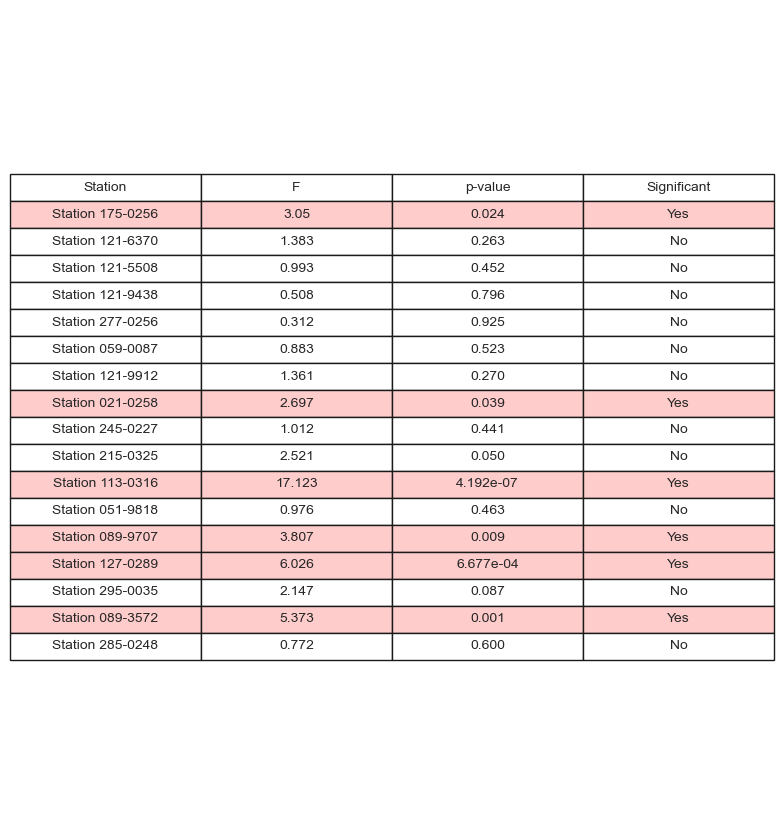

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_excel("ANOVA_summary_all_stations.xlsx")

# Round F-values and format p-values
df["F"] = df["F"].round(3)
df["p-value"] = df["p-value"].apply(lambda x: f"{x:.3e}" if x < 0.001 else f"{x:.3f}")

# Mark significance
df["Significant"] = df["p-value"].apply(lambda x: "Yes" if float(x.replace("e","E")) < 0.05 else "No")

# Save a pretty Excel table
styled = (df.style
          .applymap(lambda v: "background-color: #ffcccc" if v == "Yes" else "", subset=["Significant"])
          .set_table_styles([{"selector": "th", "props": [("font-weight", "bold"), ("background-color", "#f2f2f2")]}])
          .format(subset=["F"], precision=3)
         )
styled.to_excel("ANOVA_summary_formatted.xlsx", index=False, engine="openpyxl")

# --- Optional: Export as PNG for figures ---
fig, ax = plt.subplots(figsize=(8, len(df)*0.5))
ax.axis("off")
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

# Style table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.3)

# Color significant rows
for i, sig in enumerate(df["Significant"], start=1):
    if sig == "Yes":
        for j in range(len(df.columns)):
            table[(i, j)].set_facecolor("#ffcccc")

plt.tight_layout()
plt.savefig("ANOVA_summary_table.png", dpi=300)
plt.show()


# Bootstrapping

/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1870133730.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns = ["Hour"] + pd.to_datetime(df.columns[1:], errors="coerce").strftime("%Y-%m-%d").tolist()
/Users/nattie/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


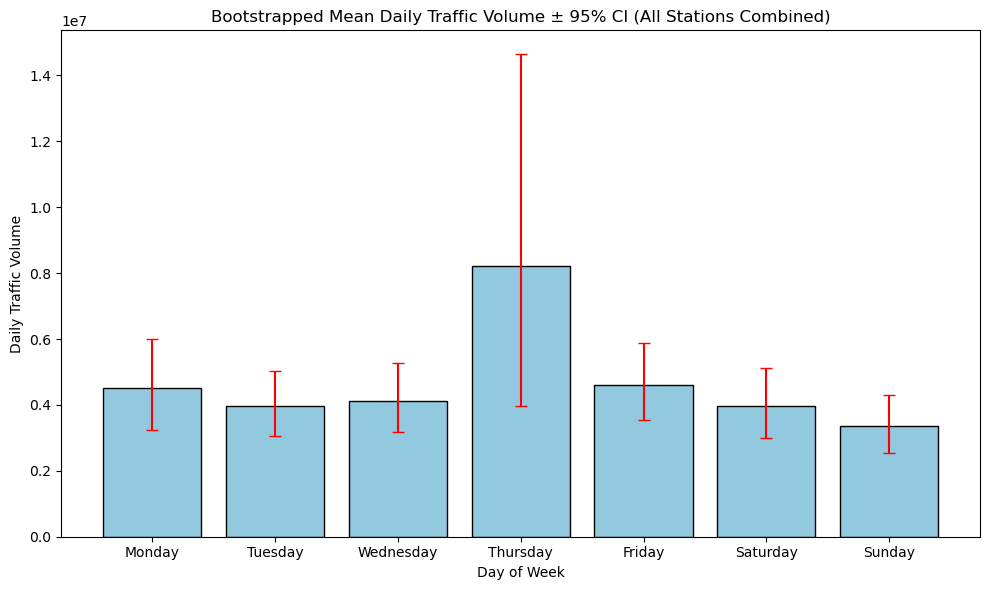


✅ Bootstrapped results saved to Bootstrapped_DailyTraffic_Table.xlsx
   DayOfWeek          Mean        CI_low       CI_high
6     Monday  4.508545e+06  3.247203e+06  6.001965e+06
0    Tuesday  3.977192e+06  3.049839e+06  5.028810e+06
1  Wednesday  4.133581e+06  3.169077e+06  5.281817e+06
2   Thursday  8.212835e+06  3.977596e+06  1.463562e+07
3     Friday  4.611860e+06  3.530441e+06  5.874432e+06
4   Saturday  3.968573e+06  3.010353e+06  5.110570e+06
5     Sunday  3.373292e+06  2.531534e+06  4.292442e+06


In [ ]:
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your ANOVA-ready files
root_path = "."
anova_files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

all_daily = []

for file in anova_files:
    station = os.path.basename(file).replace(" ANOVA-ready.xlsx", "")
    df = pd.read_excel(file, header=[0,1])

    # Fix header
    df.columns = ["Hour"] + [col[1] for col in df.columns[1:]]
    df.columns = ["Hour"] + pd.to_datetime(df.columns[1:], errors="coerce").strftime("%Y-%m-%d").tolist()

    # Melt wide → long
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    # Daily totals
    df_daily = df_long.groupby("Date")["TrafficVolume"].sum().reset_index()
    df_daily["DayOfWeek"] = df_daily["Date"].dt.day_name()
    df_daily["Station"] = station

    all_daily.append(df_daily)

# Combine all stations
df_daily_all = pd.concat(all_daily, ignore_index=True)

# --- Bootstrapping ---
n_boot = 5000
boot_results = []

for day in df_daily_all["DayOfWeek"].unique():
    sample = df_daily_all.loc[df_daily_all["DayOfWeek"] == day, "TrafficVolume"].values
    if len(sample) > 1:
        boots = [np.mean(np.random.choice(sample, size=len(sample), replace=True)) for _ in range(n_boot)]
        mean = np.mean(sample)
        ci_low, ci_high = np.percentile(boots, [2.5, 97.5])
        boot_results.append({"DayOfWeek": day, "Mean": mean, "CI_low": ci_low, "CI_high": ci_high})

boot_df = pd.DataFrame(boot_results)

# Order days
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
boot_df["DayOfWeek"] = pd.Categorical(boot_df["DayOfWeek"], categories=day_order, ordered=True)
boot_df = boot_df.sort_values("DayOfWeek")

# --- Plot ---
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

plt.figure(figsize=(10,6))
sns.barplot(data=boot_df, x="DayOfWeek", y="Mean", color="skyblue", edgecolor="black")

# Error bars
plt.errorbar(
    x=range(len(boot_df)), 
    y=boot_df["Mean"], 
    yerr=[boot_df["Mean"] - boot_df["CI_low"], boot_df["CI_high"] - boot_df["Mean"]],
    fmt="none", c="red", capsize=4, lw=1.5
)

plt.title("Bootstrapped Mean Daily Traffic Volume ± 95% CI (All Stations Combined)")
plt.ylabel("Daily Traffic Volume")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.savefig("Bootstrapped_DailyTraffic_AllStations.png", dpi=300)
plt.show()

# --- Save Table ---
boot_df.to_excel("Bootstrapped_DailyTraffic_Table.xlsx", index=False)
print("\n✅ Bootstrapped results saved to Bootstrapped_DailyTraffic_Table.xlsx")
print(boot_df)


# Predictive Model

## Baseline

In [ ]:
# -*- coding: utf-8 -*-
import os, glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# -------------------------------
# Helpers
# -------------------------------
DATE_RE = re.compile(r"^\d{4}-\d{2}-\d{2}$")
HOUR_RE = re.compile(r"^\d{2}:\d{2}:\d{2}$")

def clean_station_file(file_path: str) -> pd.DataFrame:
    """
    Read one ANOVA-ready workbook and return a long DataFrame with columns:
      Station, Date (datetime64), Hour (str), HourNum (int 0-23), TrafficVolume (float),
      DayOfWeek (1..7), Weekend (0/1), Month (1..12)
    Robust to:
      - two header rows (weekday row + date row)
      - trailing non-date columns (Average, Total, Month, SourceFile, etc.)
      - summary rows (7am-7pm, Peak Volume...)
      - blank separator columns
    """
    station = os.path.basename(file_path).replace(" ANOVA-ready.xlsx", "")
    raw = pd.read_excel(file_path, dtype=str)  # read everything as string first
    if raw.empty:
        return pd.DataFrame()

    # Ensure the first column is named "Hour"
    raw = raw.rename(columns={raw.columns[0]: "Hour"})

    # The second physical row (index 0 after header) contains the ISO dates across columns.
    # We'll build a new header row from it, keeping only columns whose row0 cell is YYYY-MM-DD.
    if raw.shape[0] < 2:
        return pd.DataFrame()

    header_row = raw.iloc[0]  # row containing ISO dates under the weekday labels
    # Build new column map: keep columns whose row0 is an ISO date
    date_cols = []
    for col in raw.columns:
        if col == "Hour":
            continue
        val = str(header_row.get(col, "")).strip()
        if DATE_RE.match(val):
            date_cols.append(col)

    # If no date columns detected, bail
    if not date_cols:
        return pd.DataFrame()

    # Rename those date columns to the ISO date value from header_row
    rename_map = {col: str(header_row[col]).strip() for col in date_cols}
    raw = raw.rename(columns=rename_map)

    # Drop the header_row (it’s not data)
    raw = raw.iloc[1:].reset_index(drop=True)

    # Keep ONLY rows that look like hours (HH:MM:SS)
    raw = raw[raw["Hour"].astype(str).str.match(HOUR_RE, na=False)]
    if raw.empty:
        return pd.DataFrame()

    # Now we have: Hour + a bunch of date-named columns; drop any non-date columns that slipped in
    keep_cols = ["Hour"] + [c for c in raw.columns if DATE_RE.match(str(c))]
    df = raw[keep_cols].copy()

    # Melt to long
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")

    # Parse and clean types
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    # HourNum
    df_long["HourNum"] = pd.to_datetime(df_long["Hour"], format="%H:%M:%S", errors="coerce").dt.hour
    df_long = df_long.dropna(subset=["HourNum"])
    df_long["HourNum"] = df_long["HourNum"].astype(int)

    # Features
    # DayOfWeek as 1..7 (Mon=1,..,Sun=7), Month 1..12, Weekend 0/1
    dow = df_long["Date"].dt.dayofweek + 1
    df_long["DayOfWeek"] = pd.Categorical(dow, categories=[1,2,3,4,5,6,7])
    df_long["Weekend"]   = df_long["DayOfWeek"].isin([6,7]).astype(int)
    df_long["Month"]     = pd.Categorical(df_long["Date"].dt.month, categories=list(range(1,13)))
    df_long["Station"]   = station

    return df_long

plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

def plot_diagnostics(y_true, y_pred, title_prefix, out_prefix):
    # Scatter: Predicted vs Actual
    plt.figure(figsize=(7,6))
    plt.scatter(y_true, y_pred, alpha=0.35, s=12)
    m = max(y_true.max(), y_pred.max())
    n = min(y_true.min(), y_pred.min())
    plt.plot([n, m], [n, m], "r--", linewidth=2, label="Perfect Fit")
    plt.xlabel("Actual Traffic Volume")
    plt.ylabel("Predicted Traffic Volume")
    plt.title(f"{title_prefix} — Predicted vs Actual")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_PredVsActual.png", dpi=300)
    plt.close()

    # Time series: sort by Date then Hour for readability
    order_idx = np.argsort(y_true.index)
    yt = y_true.iloc[order_idx].reset_index(drop=True)
    yp = pd.Series(y_pred).iloc[order_idx].reset_index(drop=True)

    plt.figure(figsize=(12,5))
    plt.plot(yt, label="Actual", alpha=0.85)
    plt.plot(yp, label="Predicted", alpha=0.85)
    plt.title(f"{title_prefix} — Time Series (Test Set)")
    plt.xlabel("Observations (sorted by time)")
    plt.ylabel("Traffic Volume")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_TimeSeries.png", dpi=300)
    plt.close()

# -------------------------------
# Load all stations
# -------------------------------
root_path = "."
files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

all_frames = []
for fp in files:
    try:
        df_one = clean_station_file(fp)
        if not df_one.empty:
            all_frames.append(df_one)
        else:
            print(f"⚠️ Skipping (no usable hourly data): {fp}")
    except Exception as e:
        print(f"❌ Failed to parse {fp}: {e}")

if not all_frames:
    raise SystemExit("No stations produced usable hourly data. Check file format assumptions.")

df_all = pd.concat(all_frames, ignore_index=True)

# -------------------------------
# Train/test split by DATE (no leakage)
# -------------------------------
unique_dates = np.sort(df_all["Date"].unique())
if len(unique_dates) < 3:
    raise SystemExit("Not enough distinct dates to split train/test.")

split_idx = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:split_idx]
test_dates  = unique_dates[split_idx:]

train = df_all[df_all["Date"].isin(train_dates)].copy()
test  = df_all[df_all["Date"].isin(test_dates)].copy()

# Keep categorical levels consistent
for col, cats in [("DayOfWeek", [1,2,3,4,5,6,7]), ("Month", list(range(1,13)))]:
    train[col] = pd.Categorical(train[col], categories=cats)
    test[col]  = pd.Categorical(test[col],  categories=cats)

# -------------------------------
# Model 1: Poisson GLM
# -------------------------------
poisson_formula = "TrafficVolume ~ HourNum + C(DayOfWeek) + Weekend + C(Month)"
poisson = smf.glm(poisson_formula, data=train, family=sm.families.Poisson()).fit()
pois_pred = poisson.predict(test)

pois_mae = mean_absolute_error(test["TrafficVolume"], pois_pred)
pois_r2  = r2_score(test["TrafficVolume"], pois_pred)

print("\n📊 Poisson GLM (pooled across stations)")
print(f"MAE: {pois_mae:.2f} | R²: {pois_r2:.3f}")

plot_diagnostics(
    y_true=test["TrafficVolume"],
    y_pred=pois_pred,
    title_prefix="Poisson GLM (All Stations)",
    out_prefix="Poisson_AllStations"
)

# -------------------------------
# Model 2: Random Forest
# -------------------------------
# Simpler numeric feature set for speed/robustness (one-hot optional)
X_train = train[["HourNum", "Weekend"]].copy()
X_test  = test[["HourNum", "Weekend"]].copy()

# Optionally add one-hot for Month and DayOfWeek for stronger performance:
X_train = pd.concat([X_train,
                     pd.get_dummies(train["DayOfWeek"], prefix="DOW", dummy_na=False),
                     pd.get_dummies(train["Month"],    prefix="M",   dummy_na=False)], axis=1)
X_test  = pd.concat([X_test,
                     pd.get_dummies(test["DayOfWeek"],  prefix="DOW", dummy_na=False),
                     pd.get_dummies(test["Month"],      prefix="M",   dummy_na=False)], axis=1)

# Align columns (in case test is missing some dummies)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

y_train = train["TrafficVolume"].values
y_test  = test["TrafficVolume"].values

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=14,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2  = r2_score(y_test, rf_pred)

print("\n🌲 Random Forest (pooled across stations)")
print(f"MAE: {rf_mae:.2f} | R²: {rf_r2:.3f}")

plot_diagnostics(
    y_true=test["TrafficVolume"],
    y_pred=pd.Series(rf_pred, index=test.index),
    title_prefix="Random Forest (All Stations)",
    out_prefix="RF_AllStations"
)

# -------------------------------
# Save a small performance table
# -------------------------------
perf = pd.DataFrame({
    "Model": ["Poisson GLM", "Random Forest"],
    "MAE":   [pois_mae, rf_mae],
    "R2":    [pois_r2,  rf_r2]
})
perf.to_excel("Predictive_Model_Performance.xlsx", index=False)
print("\n✅ Saved performance table: Predictive_Model_Performance.xlsx")
print("✅ Saved plots: Poisson_AllStations_*.png, RF_AllStations_*.png")



📊 Analyzing Station 175-0256...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 121-6370...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 121-5508...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 121-9438...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)


⚠️ Skipping ./Station 187-0009/Station 187-0009 ANOVA-ready.xlsx (no usable hourly data)

📊 Analyzing Station 277-0256...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 059-0087...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 121-9912...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 021-0258...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 245-0227...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 215-0325...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 113-0316...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)


⚠️ Skipping ./Station 139-0418/Station 139-0418 ANOVA-ready.xlsx (no usable hourly data)
⚠️ Skipping ./Station 089-9907/Station 089-9907 ANOVA-ready.xlsx (no usable hourly data)

📊 Analyzing Station 051-9818...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 089-9707...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 127-0289...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 295-0035...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 089-3572...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



📊 Analyzing Station 285-0248...


/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col], categories=cats)
/var/folders/5s/43815zbj5cv7dzv8w5jjsqmr0000gn/T/ipykernel_39461/1387348330.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]  = pd.Categorical(test[col],  categories=cats)



✅ Saved station-wise performance: Station_Model_Performance.xlsx


In [ ]:
# -*- coding: utf-8 -*-
import os, glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost as xgb

plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

# -------------------------------
# Helpers
# -------------------------------
DATE_RE = re.compile(r"^\d{4}-\d{2}-\d{2}$")
HOUR_RE = re.compile(r"^\d{2}:\d{2}:\d{2}$")

def clean_station_file(file_path: str) -> pd.DataFrame:
    station = os.path.basename(file_path).replace(" ANOVA-ready.xlsx", "")
    raw = pd.read_excel(file_path, dtype=str)
    if raw.empty:
        return pd.DataFrame()

    raw = raw.rename(columns={raw.columns[0]: "Hour"})
    if raw.shape[0] < 2:
        return pd.DataFrame()

    header_row = raw.iloc[0]
    date_cols = []
    for col in raw.columns:
        if col == "Hour":
            continue
        val = str(header_row.get(col, "")).strip()
        if DATE_RE.match(val):
            date_cols.append(col)

    if not date_cols:
        return pd.DataFrame()

    rename_map = {col: str(header_row[col]).strip() for col in date_cols}
    raw = raw.rename(columns=rename_map)
    raw = raw.iloc[1:].reset_index(drop=True)

    raw = raw[raw["Hour"].astype(str).str.match(HOUR_RE, na=False)]
    if raw.empty:
        return pd.DataFrame()

    keep_cols = ["Hour"] + [c for c in raw.columns if DATE_RE.match(str(c))]
    df = raw[keep_cols].copy()
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")

    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    df_long["HourNum"] = pd.to_datetime(df_long["Hour"], format="%H:%M:%S", errors="coerce").dt.hour
    df_long = df_long.dropna(subset=["HourNum"])
    df_long["HourNum"] = df_long["HourNum"].astype(int)

    dow = df_long["Date"].dt.dayofweek + 1
    df_long["DayOfWeek"] = pd.Categorical(dow, categories=[1,2,3,4,5,6,7])
    df_long["Weekend"]   = df_long["DayOfWeek"].isin([6,7]).astype(int)
    df_long["Month"]     = pd.Categorical(df_long["Date"].dt.month, categories=list(range(1,13)))
    df_long["Station"]   = station

    return df_long

def plot_diagnostics(y_true, y_pred, title_prefix, out_prefix):
    plt.figure(figsize=(7,6))
    plt.scatter(y_true, y_pred, alpha=0.35, s=12)
    m = max(y_true.max(), y_pred.max())
    n = min(y_true.min(), y_pred.min())
    plt.plot([n, m], [n, m], "r--", linewidth=2, label="Perfect Fit")
    plt.xlabel("Actual Traffic Volume")
    plt.ylabel("Predicted Traffic Volume")
    plt.title(f"{title_prefix} — Predicted vs Actual")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_PredVsActual.png", dpi=300)
    plt.close()

    order_idx = np.argsort(y_true.index)
    yt = y_true.iloc[order_idx].reset_index(drop=True)
    yp = pd.Series(y_pred).iloc[order_idx].reset_index(drop=True)

    plt.figure(figsize=(12,5))
    plt.plot(yt, label="Actual", alpha=0.85)
    plt.plot(yp, label="Predicted", alpha=0.85)
    plt.title(f"{title_prefix} — Time Series (Test Set)")
    plt.xlabel("Observations (sorted by time)")
    plt.ylabel("Traffic Volume")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_TimeSeries.png", dpi=300)
    plt.close()

# -------------------------------
# Run per-station models
# -------------------------------
root_path = "."
files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

results = []

for fp in files:
    station = os.path.basename(fp).replace(" ANOVA-ready.xlsx", "")
    print(f"\n📊 Analyzing {station}...")

    try:
        df = clean_station_file(fp)
        if df.empty:
            print(f"⚠️ Skipping {station}: no usable data")
            continue

        unique_dates = np.sort(df["Date"].unique())
        if len(unique_dates) < 3:
            print(f"⚠️ Skipping {station}: not enough dates")
            continue

        split_idx = int(len(unique_dates) * 0.8)
        train_dates = unique_dates[:split_idx]
        test_dates  = unique_dates[split_idx:]

        train = df[df["Date"].isin(train_dates)].copy()
        test  = df[df["Date"].isin(test_dates)].copy()

        for col, cats in [("DayOfWeek", [1,2,3,4,5,6,7]), ("Month", list(range(1,13)))]:
            train[col] = pd.Categorical(train[col], categories=cats)
            test[col]  = pd.Categorical(test[col],  categories=cats)

        # -------------------------------
        # Poisson GLM
        # -------------------------------
        try:
            poisson_formula = "TrafficVolume ~ HourNum + C(DayOfWeek) + Weekend + C(Month)"
            poisson = smf.glm(poisson_formula, data=train,
                              family=sm.families.Poisson()).fit()
            pois_pred = poisson.predict(test)
            pois_mae = mean_absolute_error(test["TrafficVolume"], pois_pred)
            pois_r2  = r2_score(test["TrafficVolume"], pois_pred)
        except Exception as e:
            print(f"❌ Poisson GLM failed for {station}: {e}")
            pois_mae, pois_r2 = np.nan, np.nan

        # -------------------------------
        # Random Forest
        # -------------------------------
        X_train = pd.concat([
            train[["HourNum", "Weekend"]],
            pd.get_dummies(train["DayOfWeek"], prefix="DOW"),
            pd.get_dummies(train["Month"], prefix="M")], axis=1)
        X_test = pd.concat([
            test[["HourNum", "Weekend"]],
            pd.get_dummies(test["DayOfWeek"], prefix="DOW"),
            pd.get_dummies(test["Month"], prefix="M")], axis=1)

        X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)
        y_train, y_test = train["TrafficVolume"].values, test["TrafficVolume"].values

        rf = RandomForestRegressor(n_estimators=300, max_depth=14,
                                   random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rf_mae = mean_absolute_error(y_test, rf_pred)
        rf_r2  = r2_score(y_test, rf_pred)

        # -------------------------------
        # XGBoost
        # -------------------------------
        xgb_model = xgb.XGBRegressor(
            n_estimators=300,
            max_depth=8,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        )
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)
        xgb_mae = mean_absolute_error(y_test, xgb_pred)
        xgb_r2  = r2_score(y_test, xgb_pred)

        # -------------------------------
        # Save diagnostics
        # -------------------------------
        plot_diagnostics(test["TrafficVolume"], pois_pred,
                         f"{station} Poisson", f"{station}_Poisson")
        plot_diagnostics(test["TrafficVolume"], rf_pred,
                         f"{station} RF", f"{station}_RF")
        plot_diagnostics(test["TrafficVolume"], xgb_pred,
                         f"{station} XGB", f"{station}_XGB")

        results.append({
            "Station": station,
            "Poisson_MAE": pois_mae, "Poisson_R2": pois_r2,
            "RF_MAE": rf_mae, "RF_R2": rf_r2,
            "XGB_MAE": xgb_mae, "XGB_R2": xgb_r2
        })

    except Exception as e:
        print(f"❌ Error with {fp}: {e}")

# -------------------------------
# Save performance table
# -------------------------------
if results:
    perf = pd.DataFrame(results)
    perf.to_excel("Station_Model_Performance.xlsx", index=False)
    print("\n✅ Saved per-station results: Station_Model_Performance.xlsx")
else:
    print("\n⚠️ No results saved. All stations failed.")



📊 Analyzing Station 175-0256...

📊 Analyzing Station 121-6370...

📊 Analyzing Station 121-5508...

📊 Analyzing Station 121-9438...

📊 Analyzing Station 187-0009...
⚠️ Skipping Station 187-0009: no usable data

📊 Analyzing Station 277-0256...

📊 Analyzing Station 059-0087...

📊 Analyzing Station 121-9912...

📊 Analyzing Station 021-0258...

📊 Analyzing Station 245-0227...

📊 Analyzing Station 215-0325...

📊 Analyzing Station 113-0316...

📊 Analyzing Station 139-0418...
⚠️ Skipping Station 139-0418: no usable data

📊 Analyzing Station 089-9907...
⚠️ Skipping Station 089-9907: no usable data

📊 Analyzing Station 051-9818...

📊 Analyzing Station 089-9707...

📊 Analyzing Station 127-0289...

📊 Analyzing Station 295-0035...

📊 Analyzing Station 089-3572...

📊 Analyzing Station 285-0248...

✅ Saved per-station results: Station_Model_Performance.xlsx


In [ ]:
# -*- coding: utf-8 -*-
import os, glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost as xgb

# -------------------------------
# Regex helpers
# -------------------------------
DATE_RE = re.compile(r"^\d{4}-\d{2}-\d{2}$")
HOUR_RE = re.compile(r"^\d{2}:\d{2}:\d{2}$")

# -------------------------------
# Data cleaning
# -------------------------------
def clean_station_file(file_path: str) -> pd.DataFrame:
    station = os.path.basename(file_path).replace(" ANOVA-ready.xlsx", "")
    raw = pd.read_excel(file_path, dtype=str)
    if raw.empty:
        return pd.DataFrame()

    raw = raw.rename(columns={raw.columns[0]: "Hour"})
    if raw.shape[0] < 2:
        return pd.DataFrame()

    header_row = raw.iloc[0]
    date_cols = []
    for col in raw.columns:
        if col == "Hour":
            continue
        val = str(header_row.get(col, "")).strip()
        if DATE_RE.match(val):
            date_cols.append(col)

    if not date_cols:
        return pd.DataFrame()

    rename_map = {col: str(header_row[col]).strip() for col in date_cols}
    raw = raw.rename(columns=rename_map)
    raw = raw.iloc[1:].reset_index(drop=True)

    raw = raw[raw["Hour"].astype(str).str.match(HOUR_RE, na=False)]
    if raw.empty:
        return pd.DataFrame()

    keep_cols = ["Hour"] + [c for c in raw.columns if DATE_RE.match(str(c))]
    df = raw[keep_cols].copy()
    df_long = df.melt(id_vars=["Hour"], var_name="Date", value_name="TrafficVolume")

    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    df_long["TrafficVolume"] = pd.to_numeric(df_long["TrafficVolume"], errors="coerce")
    df_long = df_long.dropna(subset=["Date", "TrafficVolume"])

    df_long["HourNum"] = pd.to_datetime(df_long["Hour"], format="%H:%M:%S", errors="coerce").dt.hour
    df_long = df_long.dropna(subset=["HourNum"])
    df_long["HourNum"] = df_long["HourNum"].astype(int)

    dow = df_long["Date"].dt.dayofweek + 1
    df_long["DayOfWeek"] = pd.Categorical(dow, categories=[1,2,3,4,5,6,7])
    df_long["Weekend"]   = df_long["DayOfWeek"].isin([6,7]).astype(int)
    df_long["Month"]     = pd.Categorical(df_long["Date"].dt.month, categories=list(range(1,13)))
    df_long["Station"]   = station

    # --- Add lag features (1-day & 7-day) ---
    df_long = df_long.sort_values(["Date", "HourNum"]).reset_index(drop=True)
    df_long["Lag1d"] = df_long.groupby("HourNum")["TrafficVolume"].shift(1)
    df_long["Lag7d"] = df_long.groupby("HourNum")["TrafficVolume"].shift(7)
    df_long = df_long.dropna(subset=["Lag1d", "Lag7d"])

    return df_long

# -------------------------------
# Diagnostics plots
# -------------------------------
plt.rcParams.update({ 
    'font.family': 'serif', 
    'font.serif': ['Times New Roman'], 
    'font.size': 12, 
    'text.usetex': False, })

def plot_diagnostics(y_true, y_pred, title_prefix, out_prefix):
    # Scatter plot
    plt.figure(figsize=(7,6))
    plt.scatter(y_true, y_pred, alpha=0.35, s=12)
    m = max(y_true.max(), y_pred.max())
    n = min(y_true.min(), y_pred.min())
    plt.plot([n, m], [n, m], "r--", linewidth=2, label="Perfect Fit")
    plt.xlabel("Actual Traffic Volume")
    plt.ylabel("Predicted Traffic Volume")
    plt.title(f"{title_prefix} — Predicted vs Actual")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_PredVsActual.png", dpi=300)
    plt.close()

    # Time series overlay
    order_idx = np.argsort(y_true.index)
    yt = y_true.iloc[order_idx].reset_index(drop=True)
    yp = pd.Series(y_pred).iloc[order_idx].reset_index(drop=True)

    plt.figure(figsize=(12,5))
    plt.plot(yt, label="Actual", alpha=0.85)
    plt.plot(yp, label="Predicted", alpha=0.85)
    plt.title(f"{title_prefix} — Time Series (Test Set)")
    plt.xlabel("Observations (sorted by time)")
    plt.ylabel("Traffic Volume")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_TimeSeries.png", dpi=300)
    plt.close()

# -------------------------------
# Run per-station models
# -------------------------------
root_path = "."
files = glob.glob(os.path.join(root_path, "Station */Station * ANOVA-ready.xlsx"))

results = []
all_rf_importances = []
all_xgb_importances = []

for fp in files:
    station = os.path.basename(fp).replace(" ANOVA-ready.xlsx", "")
    print(f"\n📊 Analyzing {station}...")

    try:
        df = clean_station_file(fp)
        if df.empty:
            print(f"⚠️ Skipping {station}: no usable data")
            continue

        unique_dates = np.sort(df["Date"].unique())
        if len(unique_dates) < 10:  # need at least 10 days
            print(f"⚠️ Skipping {station}: not enough dates")
            continue

        split_idx = int(len(unique_dates) * 0.8)
        train_dates = unique_dates[:split_idx]
        test_dates  = unique_dates[split_idx:]

        train = df[df["Date"].isin(train_dates)].copy()
        test  = df[df["Date"].isin(test_dates)].copy()

        # -------------------------------
        # Poisson GLM
        # -------------------------------
        try:
            poisson_formula = "TrafficVolume ~ HourNum + C(DayOfWeek) + Weekend + C(Month)"
            poisson = smf.glm(poisson_formula, data=train,
                              family=sm.families.Poisson()).fit()
            pois_pred = poisson.predict(test)
            pois_mae = mean_absolute_error(test["TrafficVolume"], pois_pred)
            pois_r2  = r2_score(test["TrafficVolume"], pois_pred)
        except Exception as e:
            print(f"❌ Poisson GLM failed for {station}: {e}")
            pois_mae, pois_r2 = np.nan, np.nan
            pois_pred = np.full(len(test), np.nan)

        # -------------------------------
        # Random Forest
        # -------------------------------
        X_train = pd.concat([
            train[["HourNum", "Weekend", "Lag1d", "Lag7d"]],
            pd.get_dummies(train["DayOfWeek"], prefix="DOW"),
            pd.get_dummies(train["Month"], prefix="M")], axis=1)
        X_test = pd.concat([
            test[["HourNum", "Weekend", "Lag1d", "Lag7d"]],
            pd.get_dummies(test["DayOfWeek"], prefix="DOW"),
            pd.get_dummies(test["Month"], prefix="M")], axis=1)

        X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)
        y_train, y_test = train["TrafficVolume"].values, test["TrafficVolume"].values

        rf = RandomForestRegressor(n_estimators=300, max_depth=14,
                                   random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rf_mae = mean_absolute_error(y_test, rf_pred)
        rf_r2  = r2_score(y_test, rf_pred)

        # Save RF feature importance
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        all_rf_importances.append(rf_importances)

        # -------------------------------
        # XGBoost
        # -------------------------------
        xgb_model = xgb.XGBRegressor(
            n_estimators=300,
            max_depth=8,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        )
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)
        xgb_mae = mean_absolute_error(y_test, xgb_pred)
        xgb_r2  = r2_score(y_test, xgb_pred)

        # Save XGB feature importance
        xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
        all_xgb_importances.append(xgb_importances)

        # -------------------------------
        # Save diagnostics + feature importance plots
        # -------------------------------
        plot_diagnostics(test["TrafficVolume"], pois_pred,
                         f"{station} Poisson", f"{station}_Poisson")
        plot_diagnostics(test["TrafficVolume"], rf_pred,
                         f"{station} RF", f"{station}_RF")
        plot_diagnostics(test["TrafficVolume"], xgb_pred,
                         f"{station} XGB", f"{station}_XGB")

        rf_importances.sort_values(ascending=False).head(15).plot(kind="bar", figsize=(8,5))
        plt.title(f"{station} — RF Feature Importance")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.savefig(f"{station}_RF_FeatureImportance.png", dpi=300)
        plt.close()

        xgb_importances.sort_values(ascending=False).head(15).plot(kind="bar", figsize=(8,5), color="orange")
        plt.title(f"{station} — XGB Feature Importance")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.savefig(f"{station}_XGB_FeatureImportance.png", dpi=300)
        plt.close()

        # -------------------------------
        # Store results
        # -------------------------------
        results.append({
            "Station": station,
            "Poisson_MAE": pois_mae, "Poisson_R2": pois_r2,
            "RF_MAE": rf_mae, "RF_R2": rf_r2,
            "XGB_MAE": xgb_mae, "XGB_R2": xgb_r2
        })

    except Exception as e:
        print(f"❌ Error with {fp}: {e}")

# -------------------------------
# Save performance table
# -------------------------------
if results:
    perf = pd.DataFrame(results)
    perf.to_excel("Station_Model_Performance_with_Lags.xlsx", index=False)
    print("\n✅ Saved per-station results: Station_Model_Performance_with_Lags.xlsx")
else:
    print("\n⚠️ No results saved. All stations failed.")

# -------------------------------
# Summary Feature Importance
# -------------------------------
if all_rf_importances:
    rf_mean_importance = pd.concat(all_rf_importances, axis=1).mean(axis=1).sort_values(ascending=False)
    rf_mean_importance.head(15).plot(kind="bar", figsize=(8,5))
    plt.title("Average RF Feature Importance Across Stations")
    plt.ylabel("Mean Importance")
    plt.tight_layout()
    plt.savefig("RF_FeatureImportance_Summary.png", dpi=300)
    plt.close()

if all_xgb_importances:
    xgb_mean_importance = pd.concat(all_xgb_importances, axis=1).mean(axis=1).sort_values(ascending=False)
    xgb_mean_importance.head(15).plot(kind="bar", figsize=(8,5), color="orange")
    plt.title("Average XGB Feature Importance Across Stations")
    plt.ylabel("Mean Importance")
    plt.tight_layout()
    plt.savefig("XGB_FeatureImportance_Summary.png", dpi=300)
    plt.close()



📊 Analyzing Station 175-0256...

📊 Analyzing Station 121-6370...

📊 Analyzing Station 121-5508...

📊 Analyzing Station 121-9438...

📊 Analyzing Station 187-0009...
⚠️ Skipping Station 187-0009: no usable data

📊 Analyzing Station 277-0256...

📊 Analyzing Station 059-0087...

📊 Analyzing Station 121-9912...

📊 Analyzing Station 021-0258...

📊 Analyzing Station 245-0227...

📊 Analyzing Station 215-0325...

📊 Analyzing Station 113-0316...

📊 Analyzing Station 139-0418...
⚠️ Skipping Station 139-0418: no usable data

📊 Analyzing Station 089-9907...
⚠️ Skipping Station 089-9907: no usable data

📊 Analyzing Station 051-9818...

📊 Analyzing Station 089-9707...

📊 Analyzing Station 127-0289...

📊 Analyzing Station 295-0035...

📊 Analyzing Station 089-3572...

📊 Analyzing Station 285-0248...

✅ Saved per-station results: Station_Model_Performance_with_Lags.xlsx
